In [15]:
#-------------------------------
# General Analysis Settings

# basepath: This defines the base directory for storing all the generated analysis files. 
# It should have at least 10-20 GB free. 
basepath = '/data/GCE_sys/'

# tag: All the generated files carry this tag. Should be descriptive of analysis.
tag = 'P8R2_PSF3_CLEAN_V6_calore' 

#--------------------------------
# Energy Binning Settings
# The energy binning by default matches that of Calore et al 2014 (see 1409.0042 Eq.2 and discussion)
# This consists of a few linear spaced bins at low energies followed by a rescursive binning definition.
# If custom binning is required, just set the bin edges using prefix_bins=... and change n_bins=0
prefix_bins=np.logspace(np.log10(300), np.log10(3e5),31) # Fixed bins go here and are prepended to any additional recursive bins


print prefix_bins


# These 4 settings are for recursive bin definitions.  To disable set n_bins=0
n_bins = 0 # number of recursive bins
E_min = 5e2 # Starting recusrion energy
E_max = 5e5 # Max recursion energy
gamma = 1.45 # Recursion index. 

#--------------------------------
# Spatial Binning
healpix_order = 8 # Healpix order.  8 gives ~0.24 degree pixel edge width.  Increase of 1 halves the bin size.

#--------------------------------
# Fermitools settings

# phfile input to gtselect. Can be merged photon file or a text file containing paths of each weekly file
#phfile_raw = '/data/fermi_data_1-8-14/phfile.txt' 
phfile_raw = '/data/fermi_data_6-26-15/phfile.txt' 


# scfile [filename]
#           Spacecraft data file containing information such as the spacecraft
#           pointing as a function of time. This file could be generated by
#           gtorbsim for simulated observations (see the gtorbsim help for further
#           explanation) or it can be obtained from the FERMI
#           Science Support Center (FSSC) website for real observations.
scfile = '/data/fermi_data_1-8-14/lat_spacecraft_merged.fits' # Path to spacecraft file


# (evclass) [integer] 
#          Event class selection for pass 7 reprocessed data. The 
#          default is 2 (source class). Other values are 0 for transient
#          data, 3 for the clean data class and 4 for the ultraclean data
#          class. 1 is currently unused. 
#evclass = 3 # FermiTools evclass
evclass = 256 # FermiTools evclass
evtype='32'

#     (convtype) [integer]
#          Conversion type. This parameter screens events based on which
#          portion of the instrument the incident gamma-ray pair conversion
#          event occurred. 0=Front, 1=Back, -1=both (defalt value). Refer 
#          to the Cicerone manual for details
#          (http://fermi.gsfc.nasa.gov/ssc/data/analysis/documentation/Cicerone).
convtype = -1

# filter [string]
#           This is the filter expression. The cuts are make using C-style
#           relational syntax like for example: ! (not), && (and), || (or), !=
#           (different), >, <, >=, <=, abs(), cos(), sin(), etc. Default is 
#           "DATA_QUAL>0 && LAT_CONFIG==1 && ABS(ROCK_ANGLE)<52".

gtfilter = 'DATA_QUAL>0 && LAT_CONFIG==1 && ABS(ROCK_ANGLE)<52' # gtmktime cut

# The fermi instrument response function.  Can get full list via command gtirfs
# ******MAKE SURE THIS MATCHES evclass and convtype above!************
# Some common ones....
# P7REP_CLEAN_V15 ( = P7REP_CLEAN_V15::FRONT + P7REP_CLEAN_V15::BACK )
# P7REP_CLEAN_V15::BACK
# P7REP_CLEAN_V15::FRONT
# P7REP_SOURCE_V15 ( = P7REP_SOURCE_V15::FRONT + P7REP_SOURCE_V15::BACK )
# P7REP_SOURCE_V15::BACK
# P7REP_SOURCE_V15::FRONT
# P7REP_ULTRACLEAN_V15 ( = P7REP_ULTRACLEAN_V15::FRONT + P7REP_ULTRACLEAN_V15::BACK )
# P7REP_ULTRACLEAN_V15::BACK
# P7REP_ULTRACLEAN_V15::FRONT
#irf = 'P7REP_CLEAN_V15' 
irf = 'P8R2_CLEAN_V6::PSF3' 


# zmax [double]
#          Maximum apparent zenith angle (degrees). It ranges from 0 to 180 (default).
zmax = 90  # Max zenith angle cut

#---------------------------------------------------------
# Some file paths containing fermi data. 

# path to 3FGL file (or 2FGL)
# can download this at http://fermi.gsfc.nasa.gov/ssc/data/access/lat/4yr_catalog/gll_psc_v14.fit
#      (2FGL is at at: http://fermi.gsfc.nasa.gov/ssc/data/access/lat/2yr_catalog/gll_psc_v08.fit)
fglpath = '/data/gll_psc_v16.fit' # 
#fglpath = '/data/gll_psc_v08.fit' # 

# Path to a fermi diffuse model.  Used only to calculate point source masking per Calore et al.
# Can get this at http://fermi.gsfc.nasa.gov/ssc/data/access/lat/BackgroundModels.html
#path_to_diffuse_model = '/home/carlson/fermitools/refdata/fermi/galdiffuse/gll_iem_v05.fits'
path_to_diffuse_model = '/data/fermi_background_models/gll_iem_v06.fits'




#---------------------------------------------------------
# Run this thing....
from Analysis import Analysis

A = Analysis( E_min, E_max, 2**healpix_order, gamma, n_bins, prefix_bins, tag, basepath, phfile_raw,
                    scfile, evclass, convtype,  zmax, irf, fglpath, gtfilter, '/data/Extended_archive_v15/Templates/', evtype,)

# A.GenFermiData(runscript=True)
#A.GenExposureMap()

# #------------------------------------------------------------------------
# # Extended source template
# A.PopulateROI([0,0],radius=360, fix_radius=360, include_point=False)
# master = np.zeros(A.templateList['W51C'].healpixCube.shape)
# for key, t in A.templateList.items():
#     master += t.healpixCube.toarray()
# #------------------------------------------------------------------------

# A.GenPointSourceTemplate(pscmap=(A.basepath + '/PSC_' + A.tag + '_fgl3.npy'))

# master += np.load(A.basepath + '/PSC_' + A.tag + '_fgl3.npy')
# np.save(A.basepath + '/PSC_' + A.tag + '_fgl3_with_ext.npy', master)

# #A.BinPhotons(outfile='binned_photons_'+A.tag+'.npy')

# A.AddFermiDiffuseModel(diffuse_path=path_to_diffuse_model,
#                        outfile='fermi_diffuse_'+A.tag+'.npy', multiplier=1.)

[    300.             377.67762354     475.46795774     598.57869449
     753.56592945     948.68329805    1194.32151166    1503.56170088
    1892.87203344    2382.98470417    3000.            3776.77623538
    4754.67957738    5985.78694491    7535.65929453    9486.83298051
   11943.2151166    15035.61700882   18928.72033441   23829.84704173
   30000.           37767.76235382   47546.79577383   59857.86944907
   75356.59294529   94868.32980505  119432.15116605  150356.17008818
  189287.20334406  238298.47041728  300000.        ]
Generating exposure map 100.00 %


In [40]:
import numpy as np
import h5py
import subprocess
import sys
sys.path.append('../')
from copy import deepcopy
import Analysis


def LoadModel(basedir, galprop_tag):
    
    
    
    #A = Analysis.Analysis(tag='P8R2_PSF3_CLEAN_V6_calore', basepath='/data/GCE_sys/', )
    
    # Load 2FGL 
#     A.AddPointSourceTemplate(fixNorm=True,pscmap='PSC_' + A.tag + '_fgl3_with_ext.npy')
#     A.CalculatePixelWeights(diffuse_model='fermi_diffuse_'+A.tag+'.npy',psc_model='../PSC_' + A.tag + '_fgl3_with_ext.npy',
#                         alpha_psc=5., f_psc=0.1)
    
#     A.AddIsotropicTemplate(fixNorm=False, fixSpectrum=False, isofile='IGRB_ackerman_2014_modA.dat') # External chi^2 used to fix normalization within uncertainties
    
#     A.AddFermiBubbleTemplate(template_file='../bubble_templates_diskcut30.0.fits', 
#                          spec_file='reduced_bubble_spec_apj_793_64.dat', fixSpectrum=False, fixNorm=False)
    
    
    A.AddHDF5Template(hdf5file=basedir +'/'+ galprop_tag+'.hdf5',verbosity=1, multiplier=1., bremsfrac=1.25, 
                  E_subsample=2, fixSpectrum=False, separate_ics=False)
    return A


def DiffuseToCount(infile, outfile):
    A = LoadModel('/data/GCE_sys/new/',infile)

    master = None
    for key, t in A.templateList.items():
        if master is None:
            master = t.healpixCube
        else:
            master += t.healpixCube

    hdu_new = pyfits.PrimaryHDU(master.astype(np.float32))
    hdu_new.header.add_comment("Diffuse model generated by Eric Carlson (erccarls@ucsc.edu)")
    hdu_new.header['CRVAL1'] = np.log10(300)
    hdu_new.header['CRPIX1'] = 0
    hdu_new.header['CDELT3'] = 0.1
    hdu_new.header['CTYPE1']= 'Log10(Energy), low'
    hdu_new.header['CUNIT1']= 'MeV'
    hdu_new.header['EXTEND']=True
    hdu_new.header['CREATOR'] = ('Eric Carlson (erccarls@ucsc.edu) Nov. 2015', '')       

    energies = np.array([300*10**(.1*i) for i in range(master.shape[0])])
    tbhdu = pyfits.BinTableHDU.from_columns([
                                    pyfits.Column(name='Energy', format='D', array=energies),])
    tbhdu.header['EXTNAME']="ENERGIES"

    hdulist = pyfits.HDUList([hdu_new,tbhdu])

    # Write to file
    hdulist.writeto(outfile,clobber=True)
    print 'gzip', outfile
    p = subprocess.Popen(['gzip -f ' + outfile ,], shell=True)
    print 'File output to', outfile + '.gz'
    
    


    
# for i in range(14,21):    
#     DiffuseToCount(infile='mod_s_%i_XCO_P8_corrected'%i, outfile='mod_s_%i_XCO_P8_corrected_counts.fits'%i)
    

for i in range(42,49):    
    DiffuseToCount(infile='mod_s_%i_XCO_P8_corrected'%i, outfile='mod_s_%i_XCO_P8_corrected_counts.fits'%i)
    

Loading HDF5 file
Integrating and Resampling ics templates...
Integrating and Resampling pi0 templates...
Integrating and Resampling brem templates...
gzip mod_s_45_XCO_P8_corrected_counts.fits
File output to mod_s_45_XCO_P8_corrected_counts.fits.gz
Loading HDF5 file
Integrating and Resampling ics templates...
Integrating and Resampling pi0 templates...
Integrating and Resampling brem templates...
gzip mod_s_46_XCO_P8_corrected_counts.fits
File output to mod_s_46_XCO_P8_corrected_counts.fits.gz
Loading HDF5 file
Integrating and Resampling ics templates...
Integrating and Resampling pi0 templates...
Integrating and Resampling brem templates...
gzip mod_s_47_XCO_P8_corrected_counts.fits
File output to mod_s_47_XCO_P8_corrected_counts.fits.gz
Loading HDF5 file
Integrating and Resampling ics templates...
Integrating and Resampling pi0 templates...
Integrating and Resampling brem templates...
gzip mod_s_48_XCO_P8_corrected_counts.fits
File output to mod_s_48_XCO_P8_corrected_counts.fits.gz


In [36]:
print  np.array([300*10**(.1*i) for i in range(master.shape[0])])

[    300.             377.67762354     475.46795774     598.57869449
     753.56592945     948.68329805    1194.32151166    1503.56170088
    1892.87203344    2382.98470417    3000.            3776.77623538
    4754.67957738    5985.78694491    7535.65929453    9486.83298051
   11943.2151166    15035.61700882   18928.72033441   23829.84704173
   30000.           37767.76235383   47546.79577383   59857.86944907
   75356.59294529   94868.32980505  119432.15116605  150356.17008818
  189287.20334406  238298.47041728]


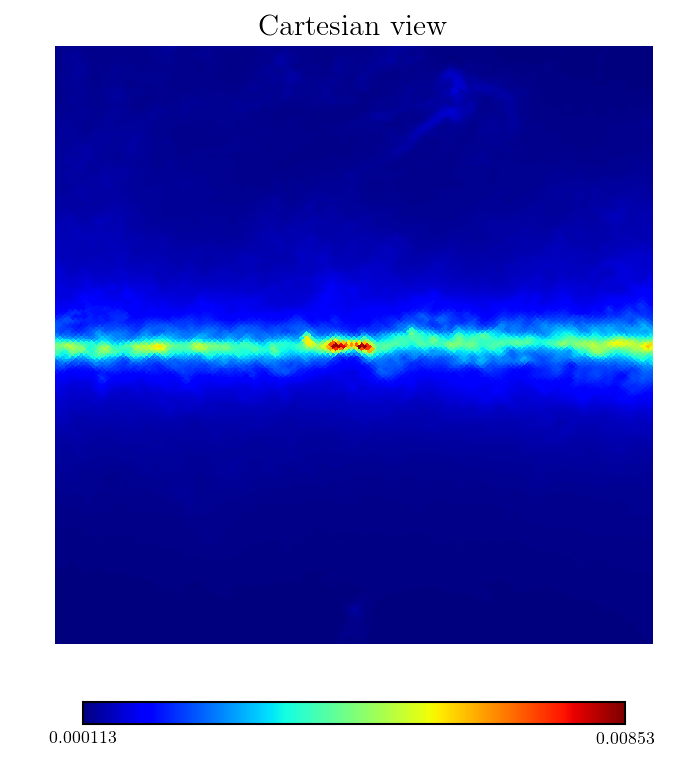

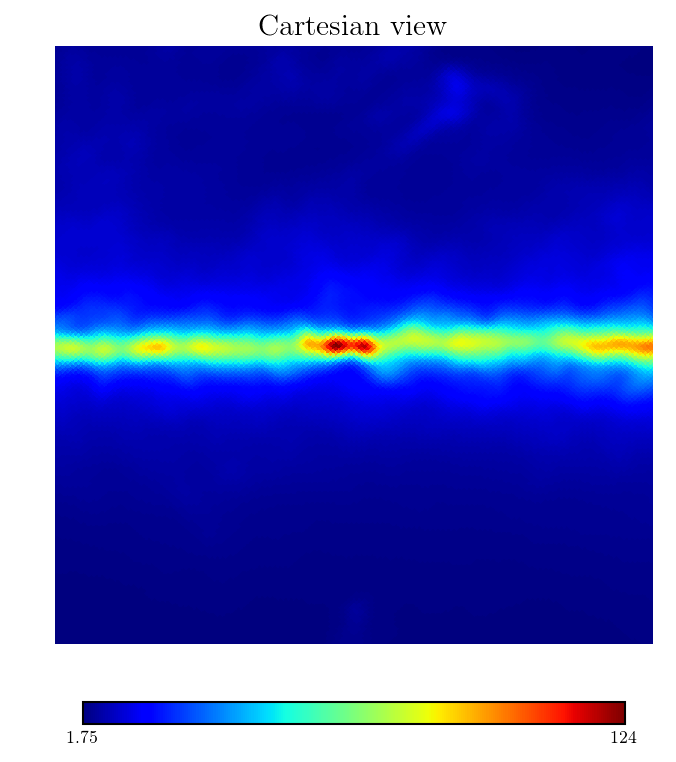

In [37]:
import healpy 
healpy.cartview(master[29], latra=[-20,20], lonra=[-20,20])
healpy.cartview(master[0], latra=[-20,20], lonra=[-20,20])

In [23]:
np.log10(300)-np.log10(377.67762354)

-0.10000000000201181